In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing as pp
from sklearn import decomposition as dc
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_wine
from matplotlib import pyplot as plt
import seaborn as sn

In [2]:
df = pd.read_csv("/home/mete/Workspace/Okul/Ders/Bil479/Data/train.csv")
df = df.fillna(0)

In [3]:
corr = df.corr()

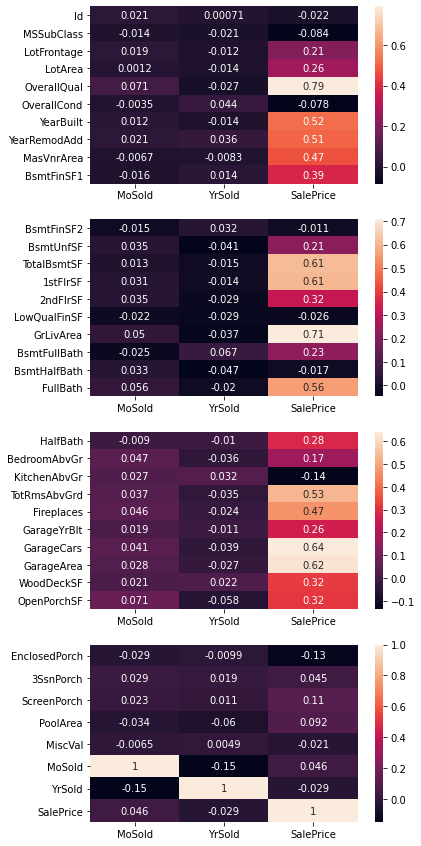

In [4]:
fig = plt.figure(figsize = (6,15))
ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)

sn.heatmap(corr.iloc[:10,35:38]  , annot=True, ax=ax1)
sn.heatmap(corr.iloc[10:20,35:38], annot=True, ax=ax2)
sn.heatmap(corr.iloc[20:30,35:38], annot=True, ax=ax3)
sn.heatmap(corr.iloc[30:38,35:38], annot=True, ax=ax4)

In [5]:
colors = [int((x/(df["SalePrice"].std()*2))) for x in df["SalePrice"]]
colors = np.array(colors)
clr_map = np.unique(colors)

In [6]:
clr_map

array([0, 1, 2, 3, 4])

In [7]:
x = df["GrLivArea"]
y = df["SalePrice"]

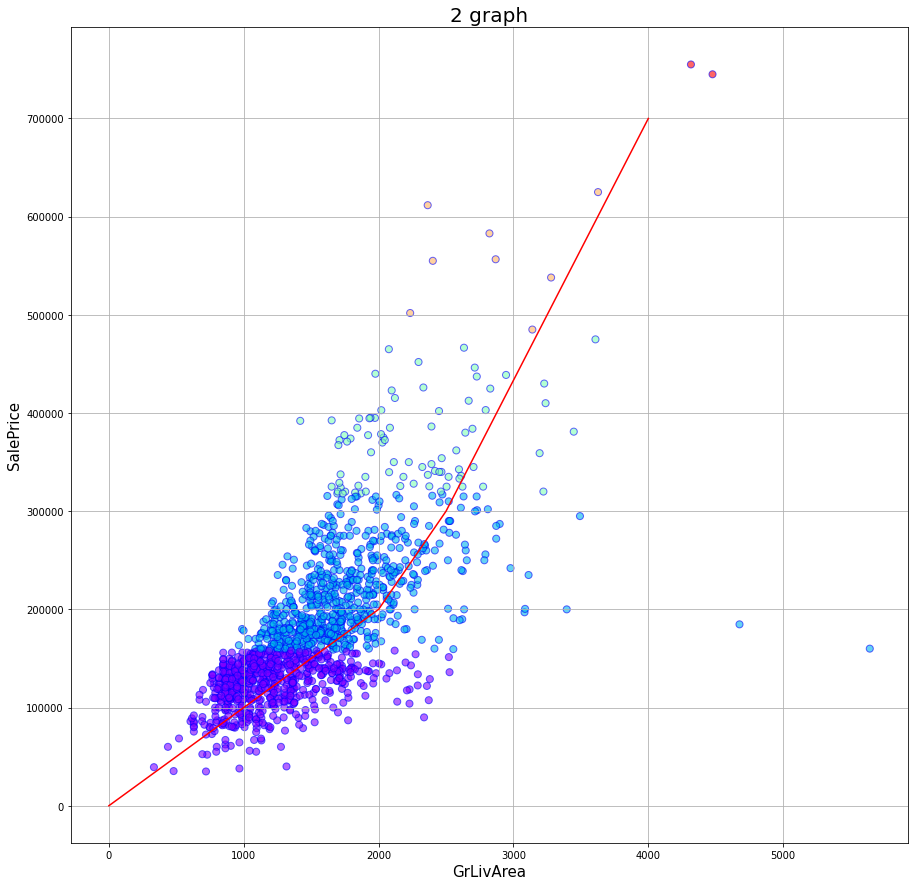

In [8]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel(x.name, fontsize = 15)
ax.set_ylabel(y.name, fontsize = 15)
ax.set_title('2 graph', fontsize = 20)
ax.scatter(x
         , y
         , s = 50
         , c = colors
         , cmap = "rainbow"
         , alpha = 0.6
         , edgecolors = "blue")
plt.plot([0,1000, 2000, 2500, 4000],[0,100000, 200000, 300000,700000],c = "red")
ax.grid()

In [9]:
numerical_features = []
for col in df.columns:
    if df[col].dtype != "object":
        numerical_features.append(col)

In [10]:
numeric_arr = df.loc[:,numerical_features[:-1]]
numeric_arr = numeric_arr.values
Scaler = pp.MinMaxScaler(feature_range=(0, 1))
std_numeric_arr = Scaler.fit_transform(numeric_arr)
std_numeric_df = pd.DataFrame(data = std_numeric_arr, columns = numerical_features[:-1]) 

In [11]:
pca = dc.PCA(n_components=2)
principalComponents = pca.fit_transform(std_numeric_arr)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['SalePrice']]], axis = 1)

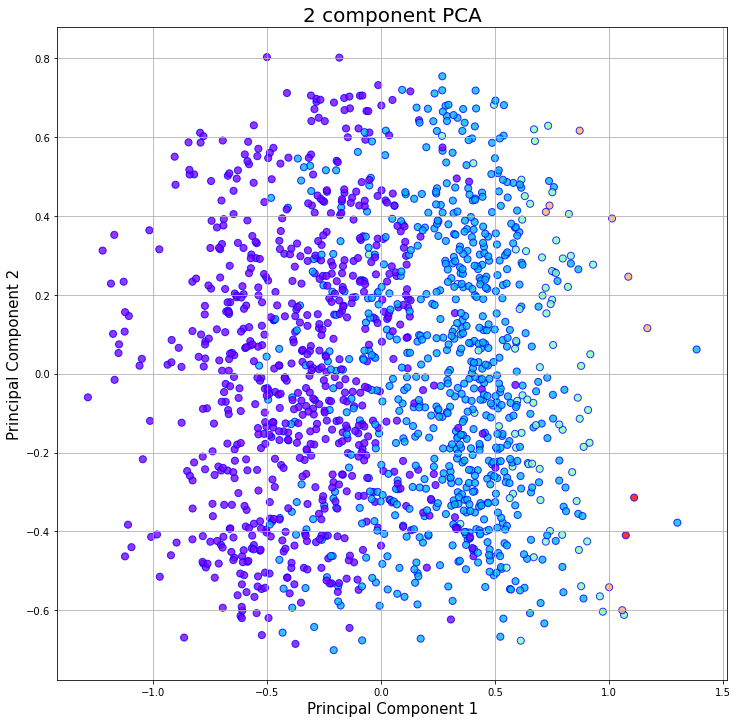

In [12]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(finalDf['principal component 1']
               , finalDf['principal component 2']
               , s = 50
               , c = colors
               , cmap = "rainbow"
               , alpha = 0.8
               , edgecolors = "blue")
ax.grid()

In [13]:
lda_df = finalDf.drop("SalePrice",axis=1)

In [14]:
clf = LinearDiscriminantAnalysis()
lda_df = clf.fit_transform(lda_df.values, colors)

In [15]:
lda_df = pd.DataFrame(data=lda_df,columns=["LDA1","LDA2"])

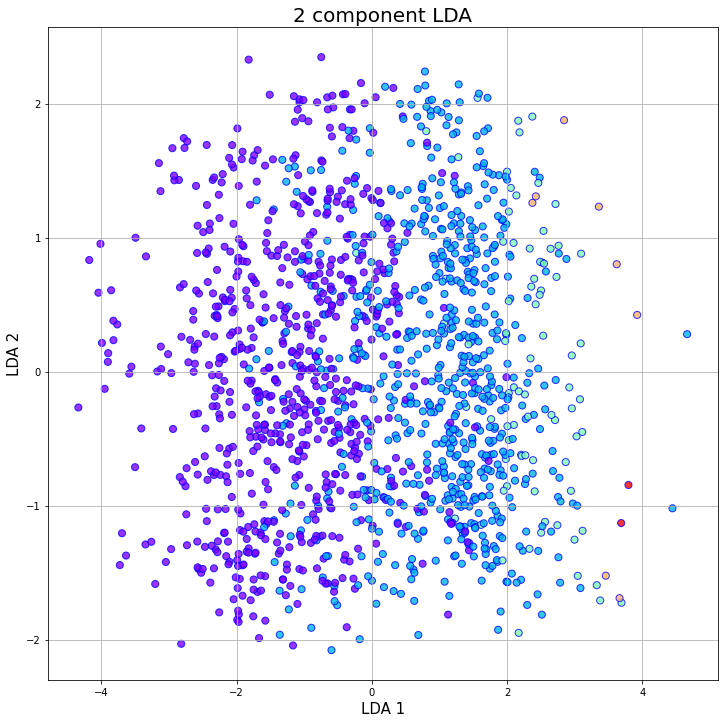

In [16]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('LDA 1', fontsize = 15)
ax.set_ylabel('LDA 2', fontsize = 15)
ax.set_title('2 component LDA', fontsize = 20)
ax.scatter(lda_df['LDA1']
               , lda_df['LDA2']
               , s = 50
               , c = colors
               , cmap = "rainbow"
               , alpha = 0.8
               , edgecolors = "blue")
ax.grid()

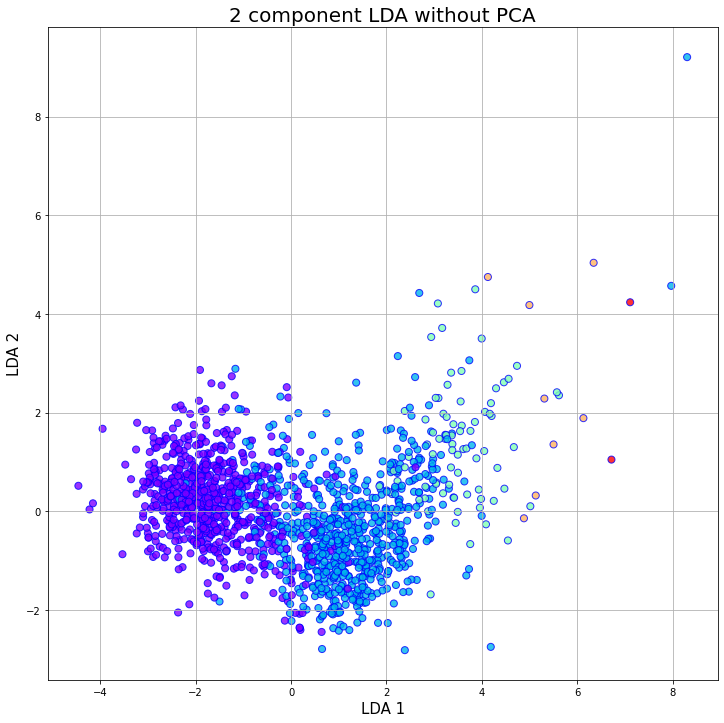

In [17]:
clf = LinearDiscriminantAnalysis(n_components=2)
lda_df = clf.fit_transform(std_numeric_arr,colors)

lda_df = pd.DataFrame(data=lda_df,columns=["LDA1","LDA2"])

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('LDA 1', fontsize = 15)
ax.set_ylabel('LDA 2', fontsize = 15)
ax.set_title('2 component LDA without PCA', fontsize = 20)
ax.scatter(lda_df['LDA1']
               , lda_df['LDA2']
               , s = 50
               , c = colors
               , cmap = "rainbow"
               , alpha = 0.8
               , edgecolors = "blue")
ax.grid()